# Importar bibliotecas


In [73]:
from file_util import FileUtil
from graph_util import GraphBuilder
import matplotlib.pyplot as plt
import networkx as nx

# Gerar grafo

num_nodes: 8
min_neighbors: 2
max_neighbors: 4
resources:
	n1: r1, r2, r3
	n2: r4, r5
	n3: r6
	n4: r7, r8
	n5: r9,
	n6: r10, r11, r12
	n7: r13, r14, r15
	n8: r16, r17, r18
edges:
	n1, n2
	n1, n3
	n2, n4
	n2, n5
    n3, n6
    n6, n7
    n5, n8
    n4, n7
    n7, n8

['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8']
[('n1', 'n2'), ('n1', 'n3'), ('n2', 'n4'), ('n2', 'n5'), ('n3', 'n6'), ('n4', 'n7'), ('n5', 'n8'), ('n6', 'n7'), ('n7', 'n8')]


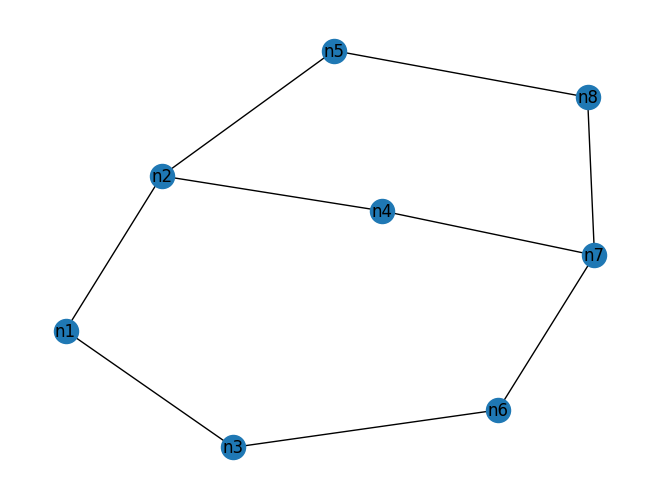

In [74]:
fileUtil = FileUtil('input_example.txt')
graphBuilder = GraphBuilder()

file_content = fileUtil.read()
print(file_content)

graph = graphBuilder.build(file_content)
if graph:
    print(graph.nodes)
    print(graph.edges)

nx.draw(graph, with_labels=True)
plt.show()

# Flooding

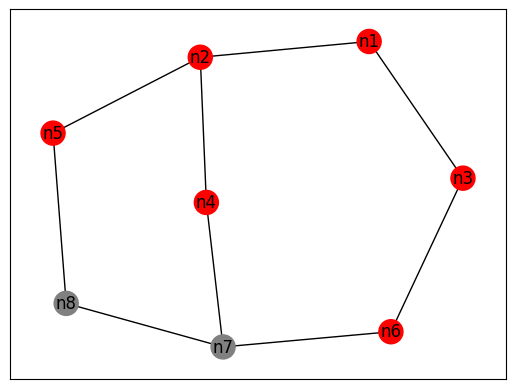

O valor 'r7' foi encontrado no nó n4.
Número total de mensagens trocadas: 5
Número total de nós visitados: 4


In [80]:
import networkx as nx

resource = graphBuilder.resources

# Definir a cor para nós visitados e não visitados
visited_color = 'red'
not_visited_color = 'gray'

def flooding(graph, initial_node_id, resource_id, ttl):
    visited = set()
    queue = [initial_node_id]
    messages_exchanged = 0


    while queue and ttl > 0:
        node = queue.pop(0)
        visited.add(node)
        graph.nodes[node]['visited'] = True
        for x in range(len(graph.nodes[node]['resources'])):
            if graph.nodes[node]['resources'][x] == resource_id:
                return node, messages_exchanged, len(visited)

        neighbors = graph.neighbors(node)
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append(neighbor)
                messages_exchanged += 1

        ttl -= 1

    return None, messages_exchanged, len(visited)


initial_node_id = 'n1'
resource_id = 'r7'
ttl = 10

result, messages_exchanged, num_nodes_visited = flooding(graph, initial_node_id, resource_id, ttl)
node_colors = [visited_color if graph.nodes[node].get('visited', False) else not_visited_color for node in graph.nodes]

# Plotar o grafo
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos, node_color=node_colors, with_labels=True)

# Mostrar o gráfico
plt.show()

if result is not None:
    print(f"O valor '{resource_id}' foi encontrado no nó {result}.")
else:
    print(f"O valor '{resource_id}' não foi encontrado no grafo dentro do TTL especificado.")

print(f"Número total de mensagens trocadas: {messages_exchanged}")
print(f"Número total de nós visitados: {num_nodes_visited}")



# Random_Walk

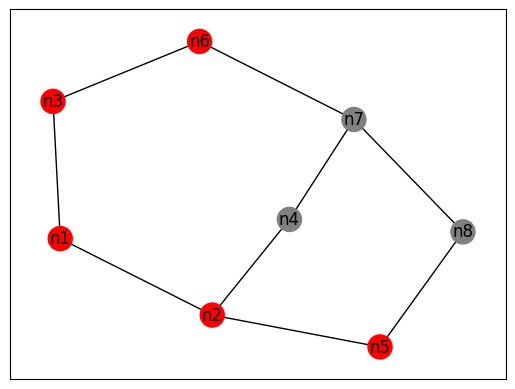

O valor 'r10' foi encontrado no nó n6.
Número total de mensagens trocadas: 2


In [79]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Definir a cor para nós visitados e não visitados
visited_color = 'red'
not_visited_color = 'gray'

resource = graphBuilder.resources

def random_walk(graph, initial_node_id, resource_id, ttl):
    node = initial_node_id
    messages_exchanged = 0

    while ttl > 0:
        graph.nodes[node]['visited'] = True

        if graph.nodes[node]['resources'] and resource_id in graph.nodes[node]['resources']:
            return node, messages_exchanged

        neighbors = list(graph.neighbors(node))
        if neighbors:
            next_node = random.choice(neighbors)
            node = next_node
            messages_exchanged += 1
        else:
            break

        ttl -= 1

    return None, messages_exchanged

initial_node_id = 'n1'
resource_id = 'r10'
ttl = 10

result, messages_exchanged = random_walk(graph, initial_node_id, resource_id, ttl)

# Colorir os nós visitados
node_colors = [visited_color if graph.nodes[node].get('visited', False) else not_visited_color for node in graph.nodes()]

# Plotar o grafo
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos, node_color=node_colors, with_labels=True)

# Mostrar o gráfico
plt.show()

if result is not None:
    print(f"O valor '{resource_id}' foi encontrado no nó {result}.")
else:
    print(f"O valor '{resource_id}' não foi encontrado no grafo dentro do TTL especificado.")

print(f"Número total de mensagens trocadas: {messages_exchanged}")
